In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import Counter
from IPython.display import Image

In [2]:
trn = pd.read_csv('../../input/train.csv', na_values=['-1','-1.0'])
test = pd.read_csv('../../input/test.csv', na_values=['-1','-1.0'])

In [3]:
print(trn.shape)
print(test.shape)

(595212, 59)
(892816, 58)


In [4]:
print('train target: ',Counter(trn.target))

train target:  Counter({0: 573518, 1: 21694})


## Structure

In [5]:
trn.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2            2.0          5            1.0   
1   9       0          1            1.0          7            0.0   
2  13       0          5            4.0          9            1.0   
3  16       0          0            1.0          2            0.0   
4  17       0          0            2.0          0            1.0   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin       ...        \
0            0.0              0              1              0       ...         
1            0.0              0              0              1       ...         
2            0.0              0              0              1       ...         
3            0.0              1              0              0       ...         
4            0.0              1              0              0       ...         

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 59 columns]

In [6]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

## Create Variable

In [7]:
trn['mscnt'] = np.sum(np.isnan(trn),axis=1)
test['mscnt'] = np.sum(np.isnan(trn),axis=1)

## Variables by class

In [8]:
binary = list()
category = list()
integer = list()
for col in trn.columns[2:]:
    if 'bin' in col:
        binary.append(col)
    elif 'cat' in col:
        category.append(col)
    else:
        integer.append(col)

In [9]:
trn[binary] = trn[binary].astype(object)
trn[category] = trn[category].astype(object)
test[binary] = test[binary].astype(object)
test[category] = test[category].astype(object)

## Missing Value

### target에 따라서 결측값 빈도수는 크게 차이가 없어 보인다.

Train dataset


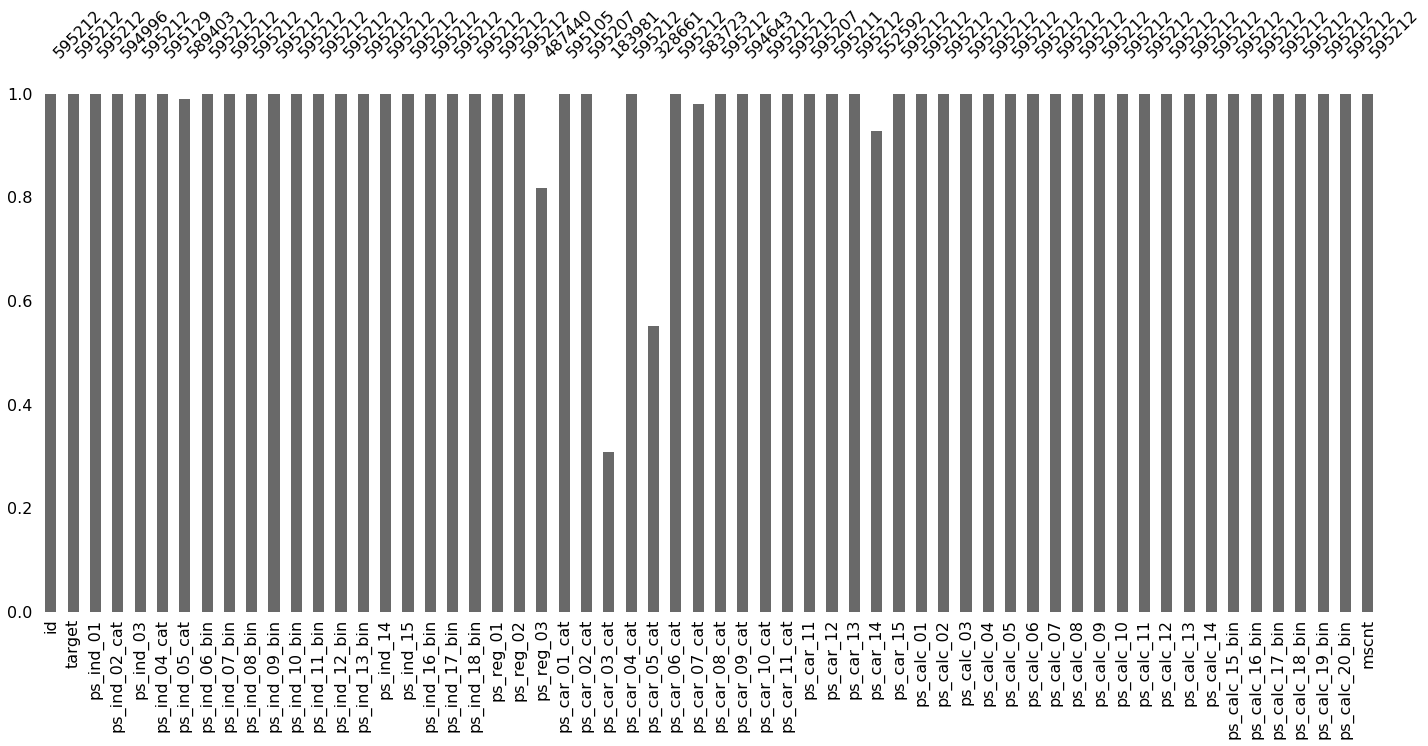

target = 0


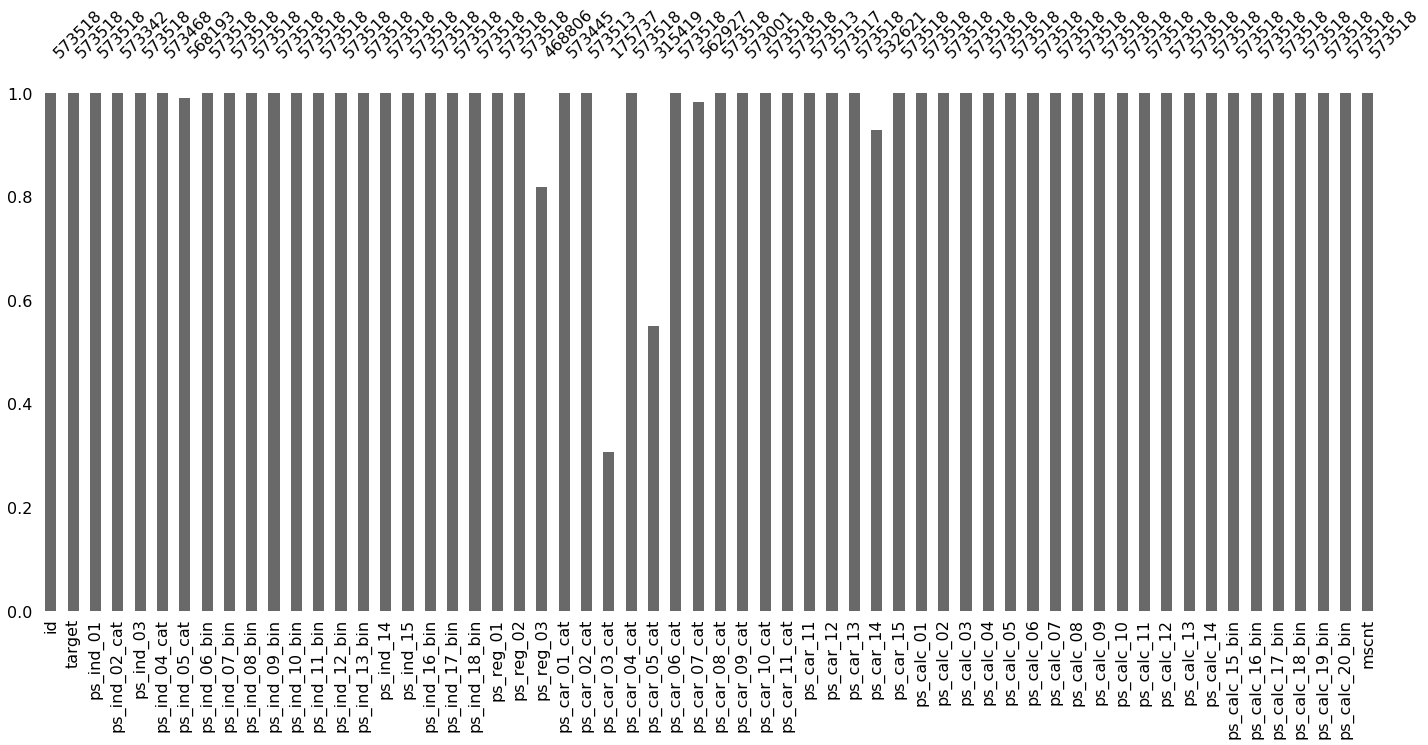

target = 1


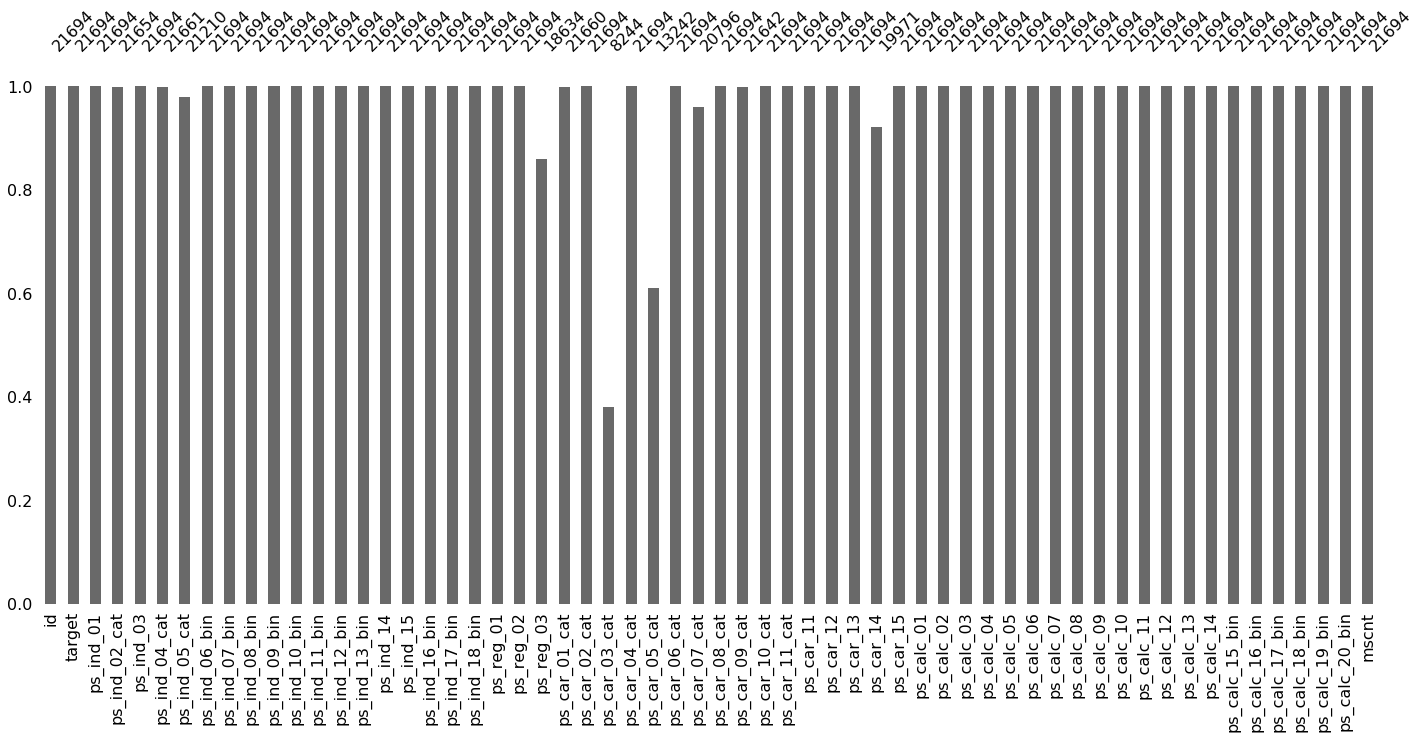

In [10]:
print('Train dataset')
msno.bar(trn)
plt.show()
print('target = 0')
msno.bar(trn[trn['target']==0])
plt.show()
print('target = 1')
msno.bar(trn[trn['target']==1])
plt.show()

### target에 따라 결측값에 대한 큰 패턴은 보이지 않는다.

Train dataset


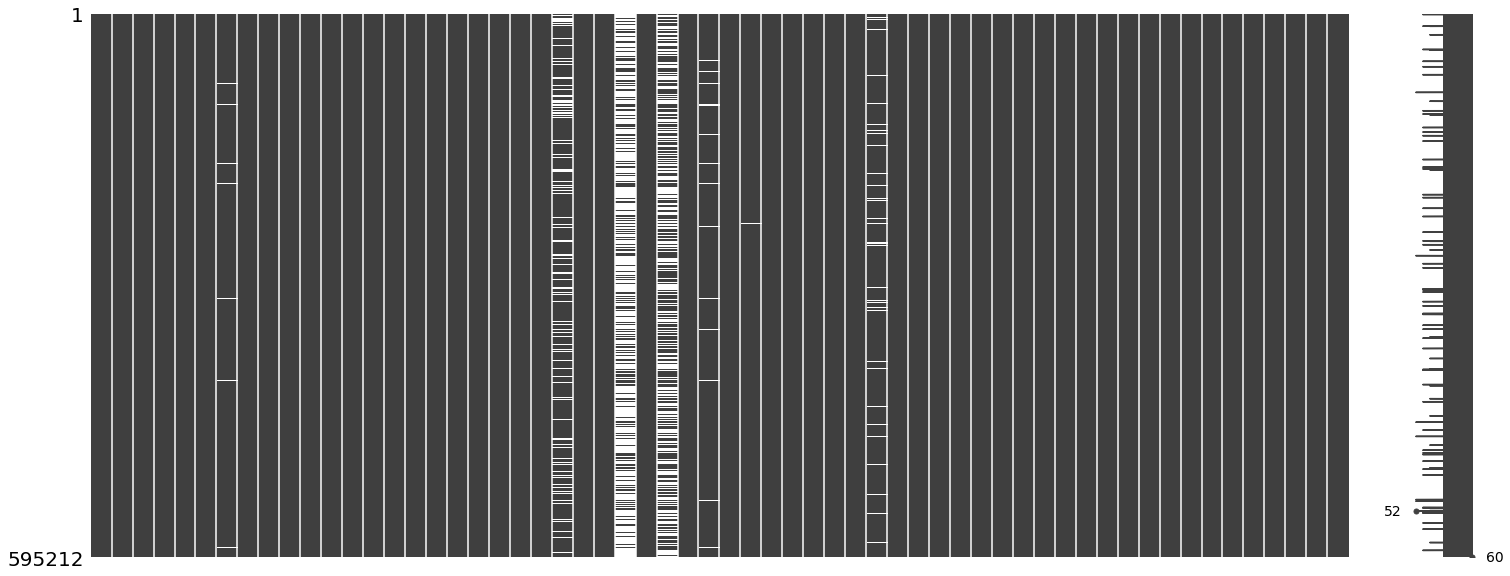

target = 0


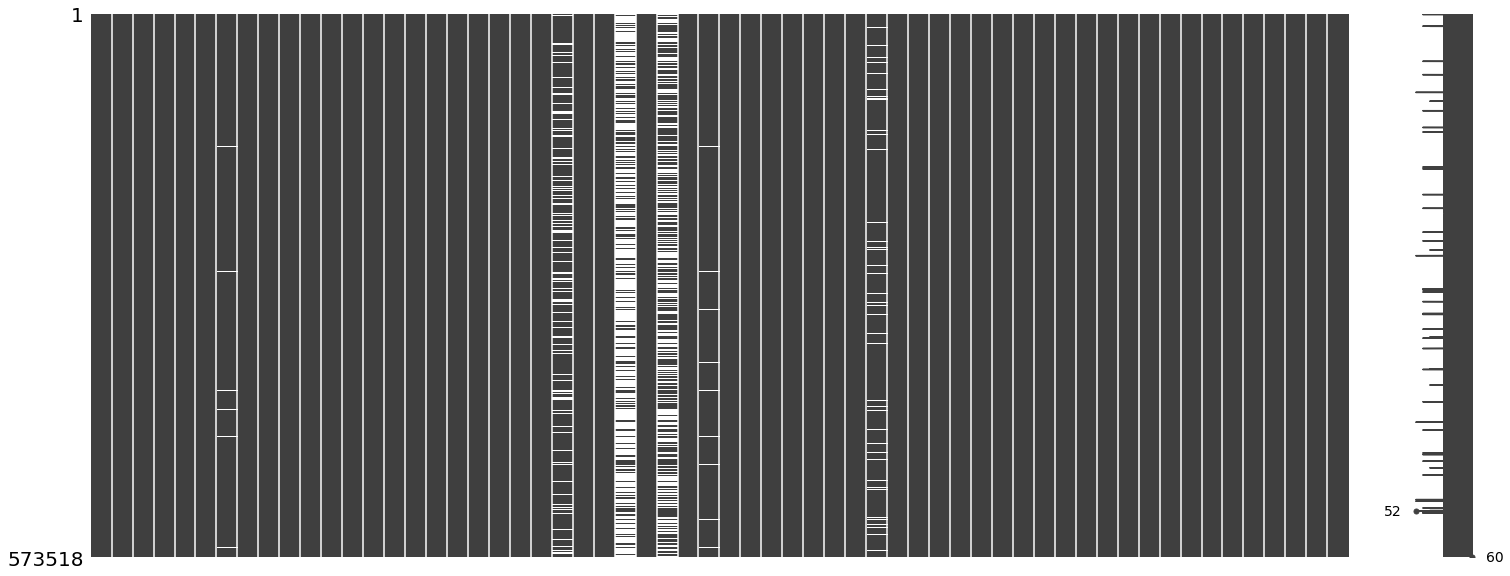

target = 1


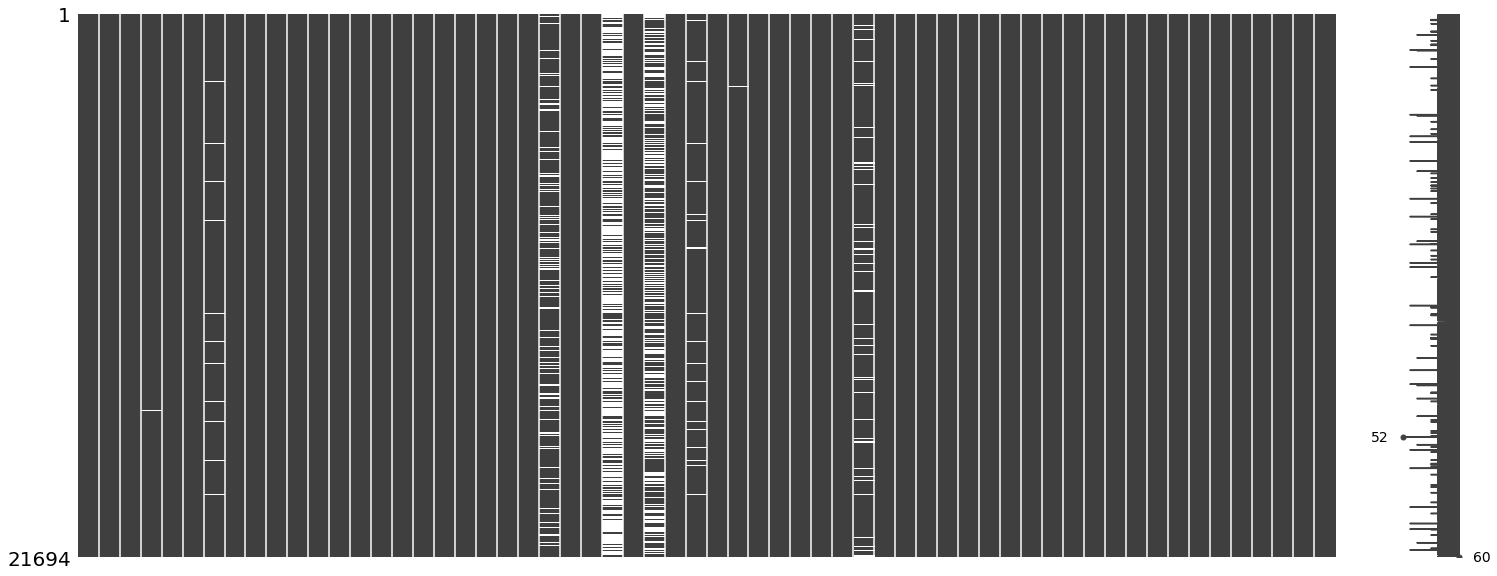

In [11]:
print('Train dataset')
msno.matrix(trn)
plt.show()
print('target = 0')
msno.matrix(trn[trn['target']==0])
plt.show()
print('target = 1')
msno.matrix(trn[trn['target']==1])
plt.show()

### target에 따라 결측값의 상관계수가 다르다.

target 1일 때 0보다 상관계수가 높은 변수들
- [ps_ind_04_cat,ps_ind_02_cat] : target1:target0 = 0.9 > 0.5
- [ps_car_01_cat,ps_ind_02_cat] : target1:target0 = 0.9 > 0.5
- [ps_cat_09_cat,ps_ind_02_cat] : target1:target0 = 0.5 > 0.1
- 

Train dataset


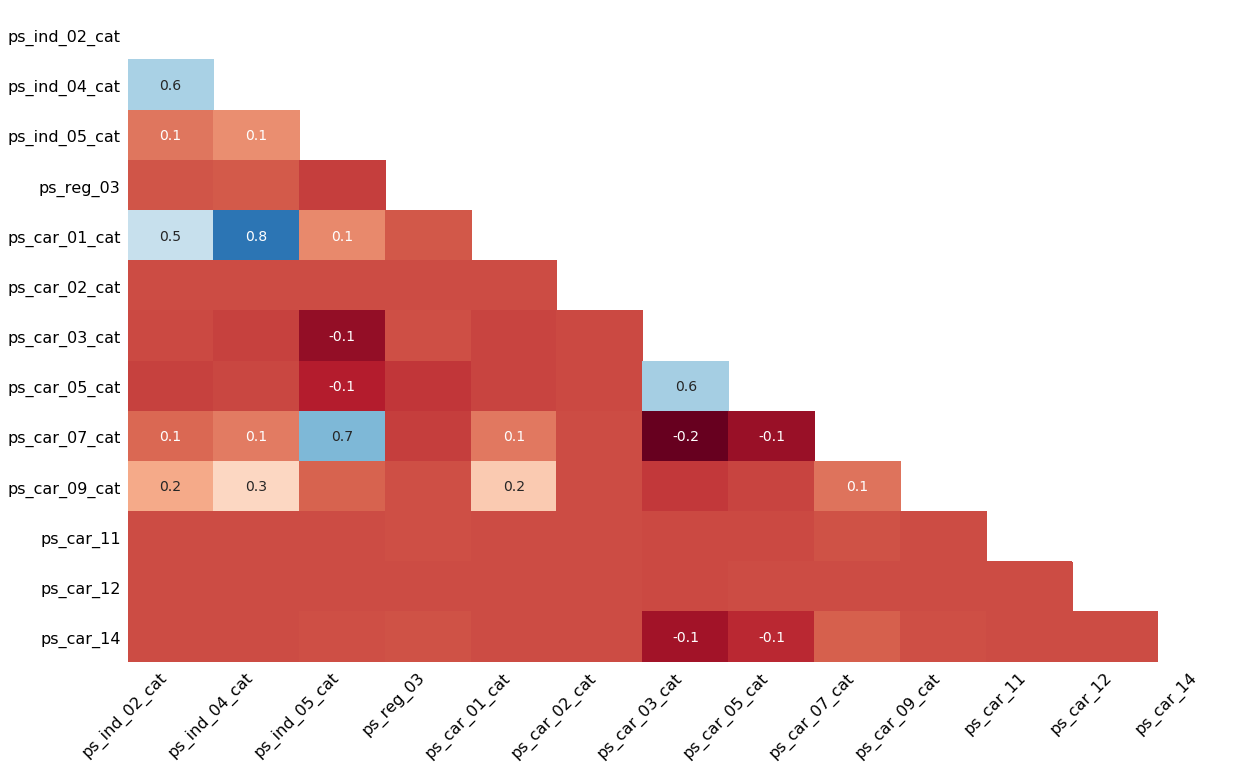

target = 0


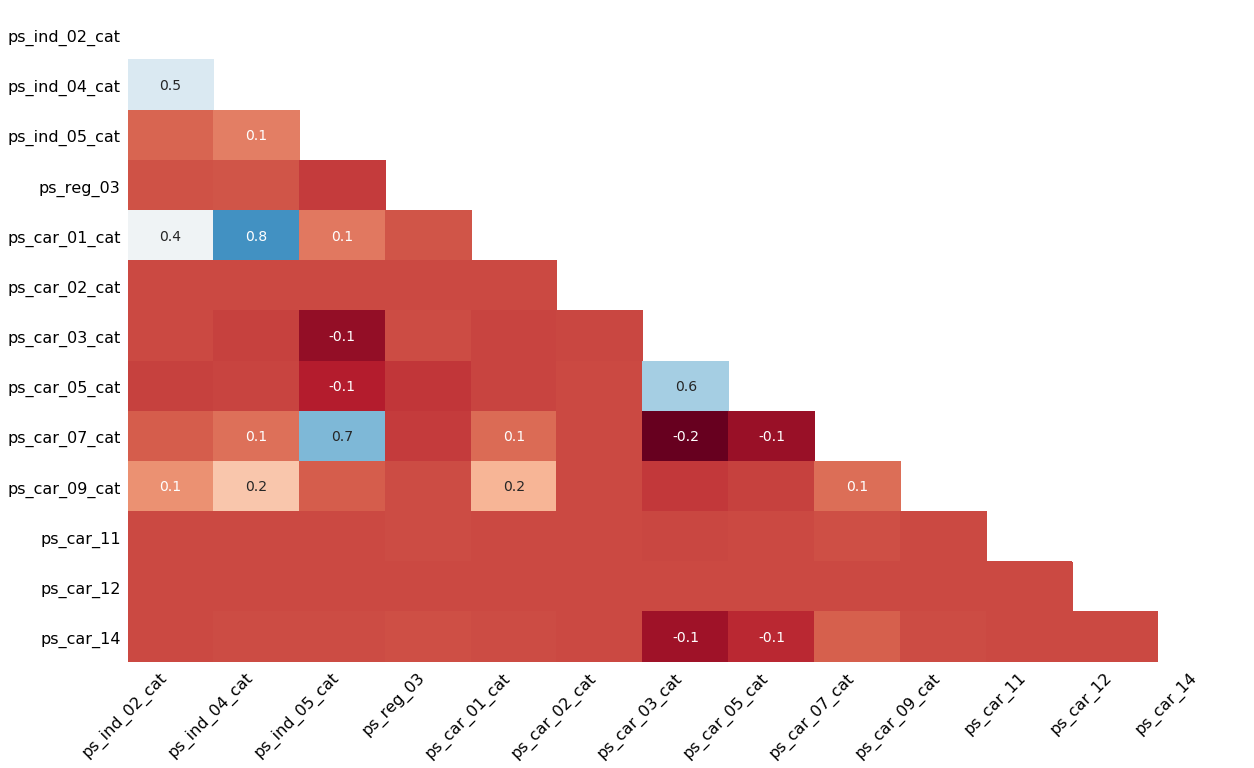

target = 1


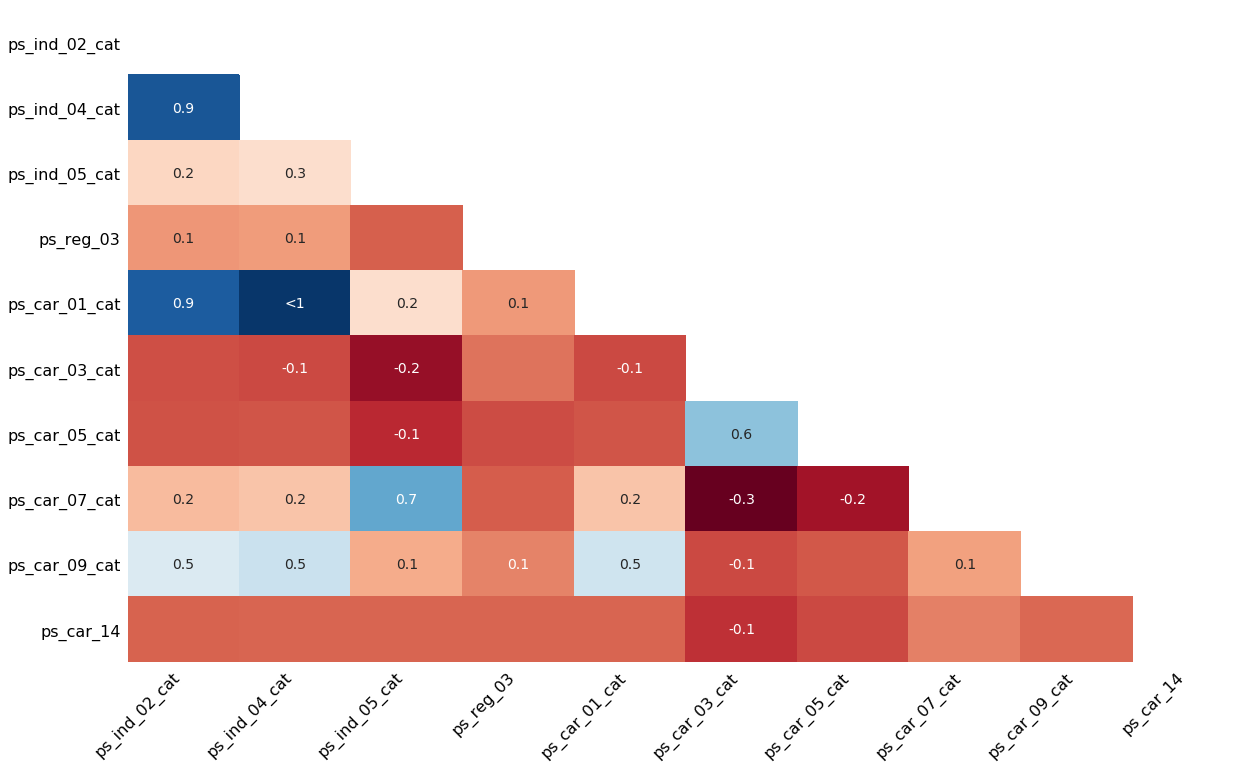

In [12]:
print('Train dataset')
msno.heatmap(trn)
plt.show()
print('target = 0')
msno.heatmap(trn[trn['target']==0])
plt.show()
print('target = 1')
msno.heatmap(trn[trn['target']==1])
plt.show()

## plotting function

In [13]:
def f(x,y,r,**kwargs):
    percent = np.round(y.values / float(sum(y)), 3) * 100
    ax = sns.barplot(x,y,**kwargs)
    ax.axhline(np.mean(y.values), alpha=0.5, color='red')
    for i in range(len(x)):
        start = 1 if x.values[0]!=0 else 0
        ax.annotate('{0:s}\n{1:.1f}%'.format(str(y.values[i]),percent[i]), xy=(x.values[i]-start, y.values[i]),fontsize=8*r,
                    xytext = (0,10*r), textcoords="offset points", color=kwargs.get("color","k"),
                    va='center', ha='center',weight='bold')

In [50]:
def f2(x,y,r,**kwargs):
    ax = sns.barplot(x,y,**kwargs)
    ax.axhline(np.mean(y.values), alpha=0.5, color='red')
    for i in range(len(x)):
        start = 1 if x.values[0]!=0 else 0
        ax.annotate('{0:.3f}'.format(y.values[i]), xy=(x.values[i]-start, y.values[i]),fontsize=8*r,
                    xytext = (0,2*r), textcoords="offset points", color=kwargs.get("color","k"),
                    va='center', ha='center',weight='bold')

In [15]:
def factor_plot(col):
    ct = pd.crosstab(trn[col],trn.target)
    stacked = ct.stack().reset_index().rename(columns={0:'value'})
    rate = np.sqrt(len(stacked)/4)
    g = sns.FacetGrid(stacked, col='target', sharey=False, height=4*rate, aspect=rate)
    g.map(f,col,'value',r=rate)

In [51]:
def integer_plot(col):
    mean_int = trn.groupby('target').mean()[col]
    median_int = trn.groupby('target').median()[col]
    std_int = trn.groupby('target').std()[col]
    int_df = pd.DataFrame({'mean':mean_int, 'median':median_int, 'std':std_int})
    unstacked = int_df.unstack().reset_index().rename(columns={0:'value'})
    print(unstacked)
    g = sns.FacetGrid(unstacked, col='level_0', sharey=False)
    g.map(f2, 'target', 'value', r=1)

## Binary variables

In [17]:
print('binary variables count: ',len(binary))

binary variables count:  17


In [18]:
trn[binary].describe()

ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
count          595212         595212         595212         595212   
unique              2              2              2              2   
top                 0              0              0              0   
freq           360852         442223         497644         484917   

        ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  \
count          595212         595212         595212         595212   
unique              2              2              2              2   
top                 0              0              0              0   
freq           594990         594205         589594         594648   

        ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_calc_15_bin  \
count          595212         595212         595212          595212   
unique              2              2              2               2   
top                 1              0              0               0   
freq           393330         523143         503879          522342   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
count           595212          595212          595212          595212   
unique               2               2               2               2   
top                  1               1               0               0   
freq            373698          329856          424278          387469   

        ps_calc_20_bin  
count           595212  
unique               2  
top                  0  
freq            503955

### barplot by target

ps_ind_06_bin


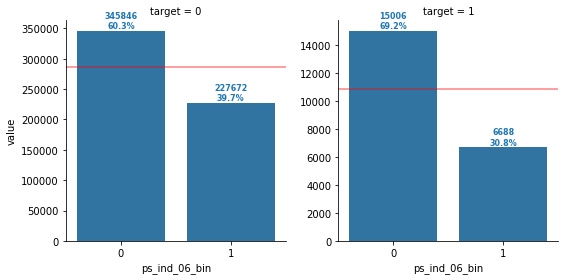

ps_ind_07_bin


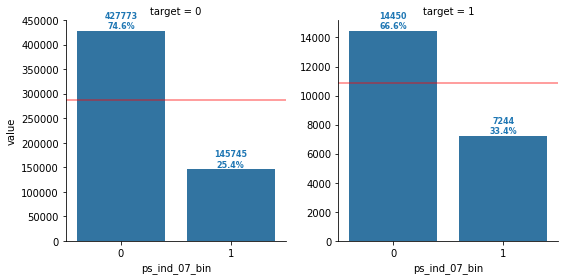

ps_ind_08_bin


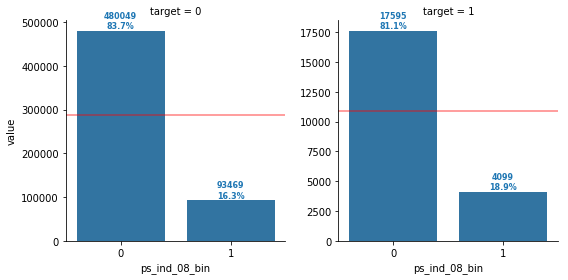

ps_ind_09_bin


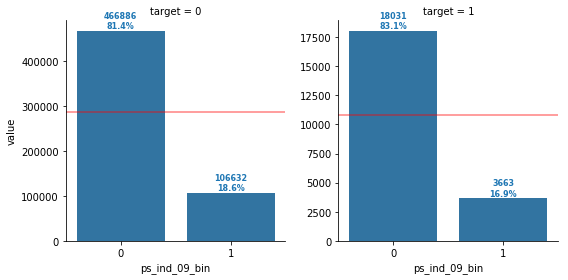

ps_ind_10_bin


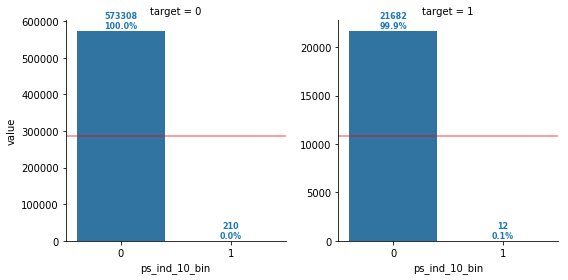

ps_ind_11_bin


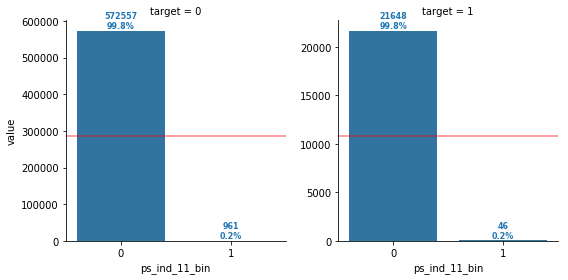

ps_ind_12_bin


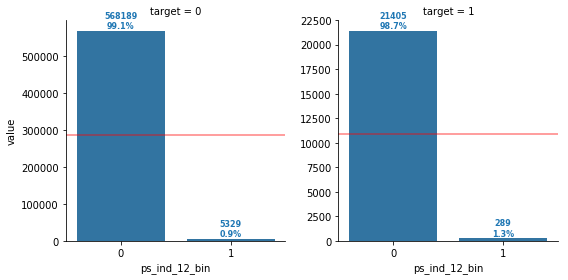

ps_ind_13_bin


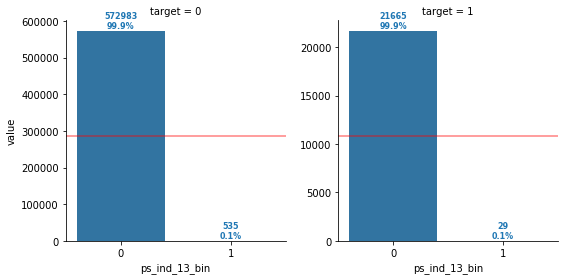

ps_ind_16_bin


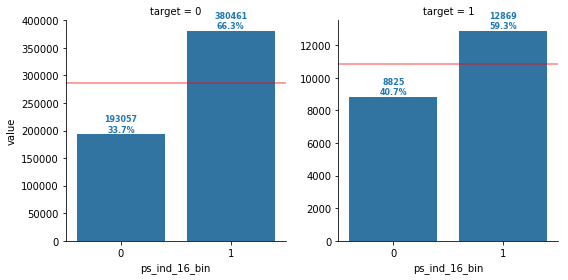

ps_ind_17_bin


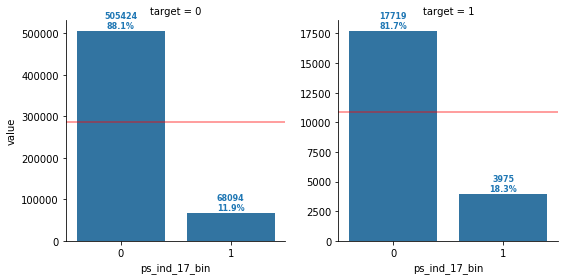

ps_ind_18_bin


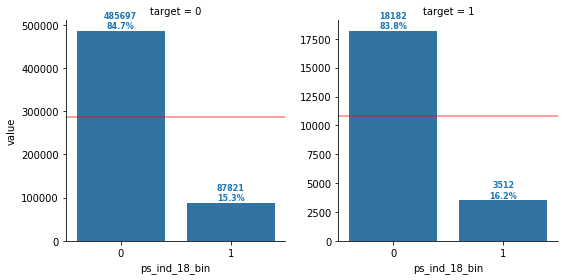

ps_calc_15_bin


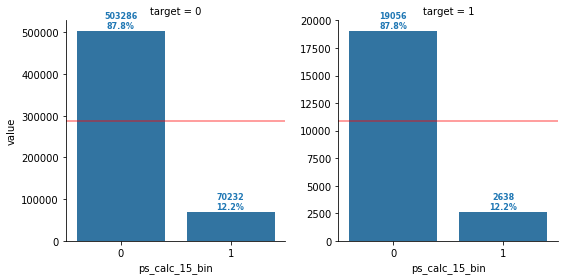

ps_calc_16_bin


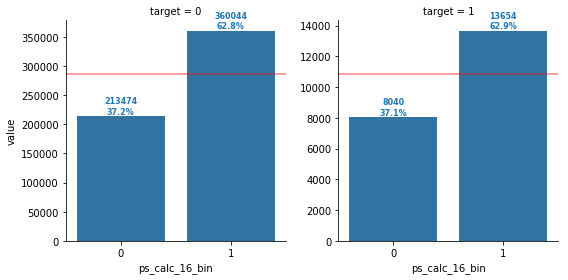

ps_calc_17_bin


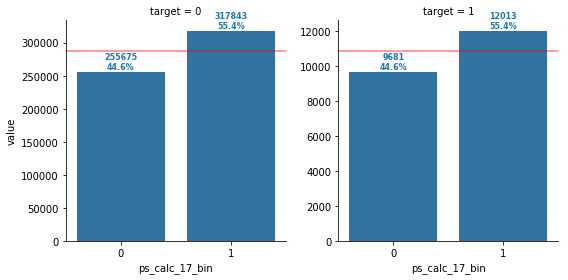

ps_calc_18_bin


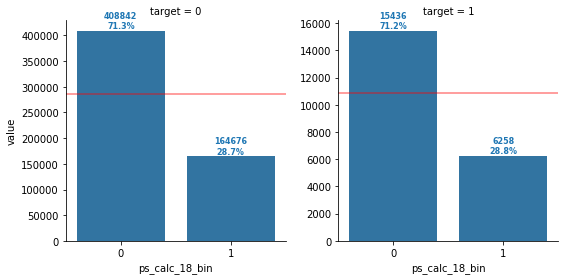

ps_calc_19_bin


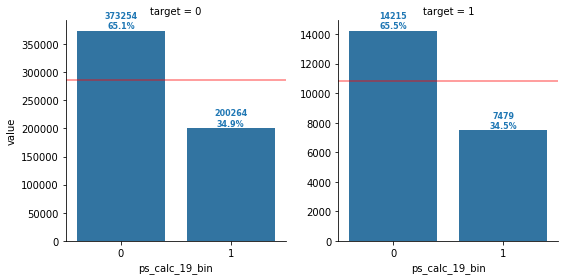

ps_calc_20_bin


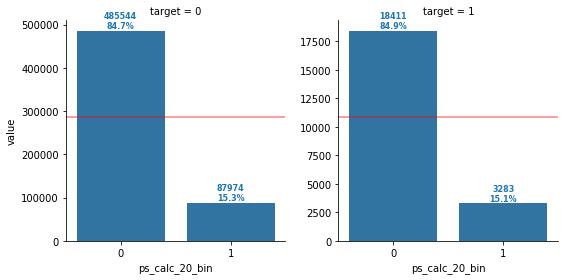

In [19]:
for col in binary:
    print('='*100)
    print(col)
    factor_plot(col)
    plt.show()

## Category values

In [20]:
trn[category].describe()

ps_ind_02_cat  ps_ind_04_cat  ps_ind_05_cat  ps_car_01_cat  \
count        594996.0       595129.0       589403.0       595105.0   
unique            4.0            2.0            7.0           12.0   
top               1.0            0.0            0.0           11.0   
freq         431859.0       346965.0       528009.0       207573.0   

        ps_car_02_cat  ps_car_03_cat  ps_car_04_cat  ps_car_05_cat  \
count        595207.0       183981.0         595212       328661.0   
unique            2.0            2.0             10            2.0   
top               1.0            1.0              0            1.0   
freq         493990.0       110709.0         496581       172667.0   

        ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  ps_car_09_cat  \
count          595212       583723.0         595212       594643.0   
unique             18            2.0              2            5.0   
top                11            1.0              1            2.0   
freq           131527       553148.0         495264       353482.0   

        ps_car_10_cat  ps_car_11_cat  
count          595212         595212  
unique              3            104  
top                 1            104  
freq           590179          85083

### barplot by target

ps_ind_02_cat


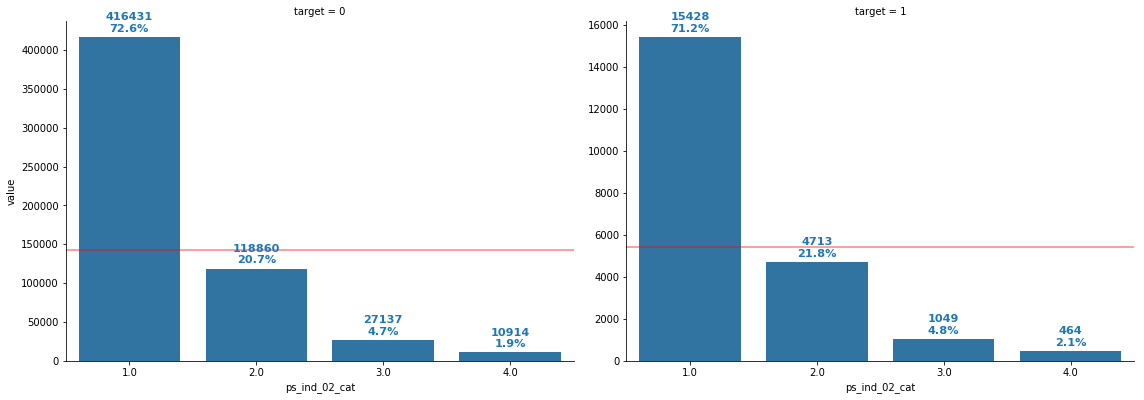

ps_ind_04_cat


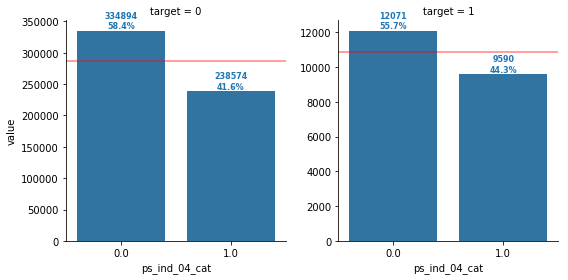

ps_ind_05_cat


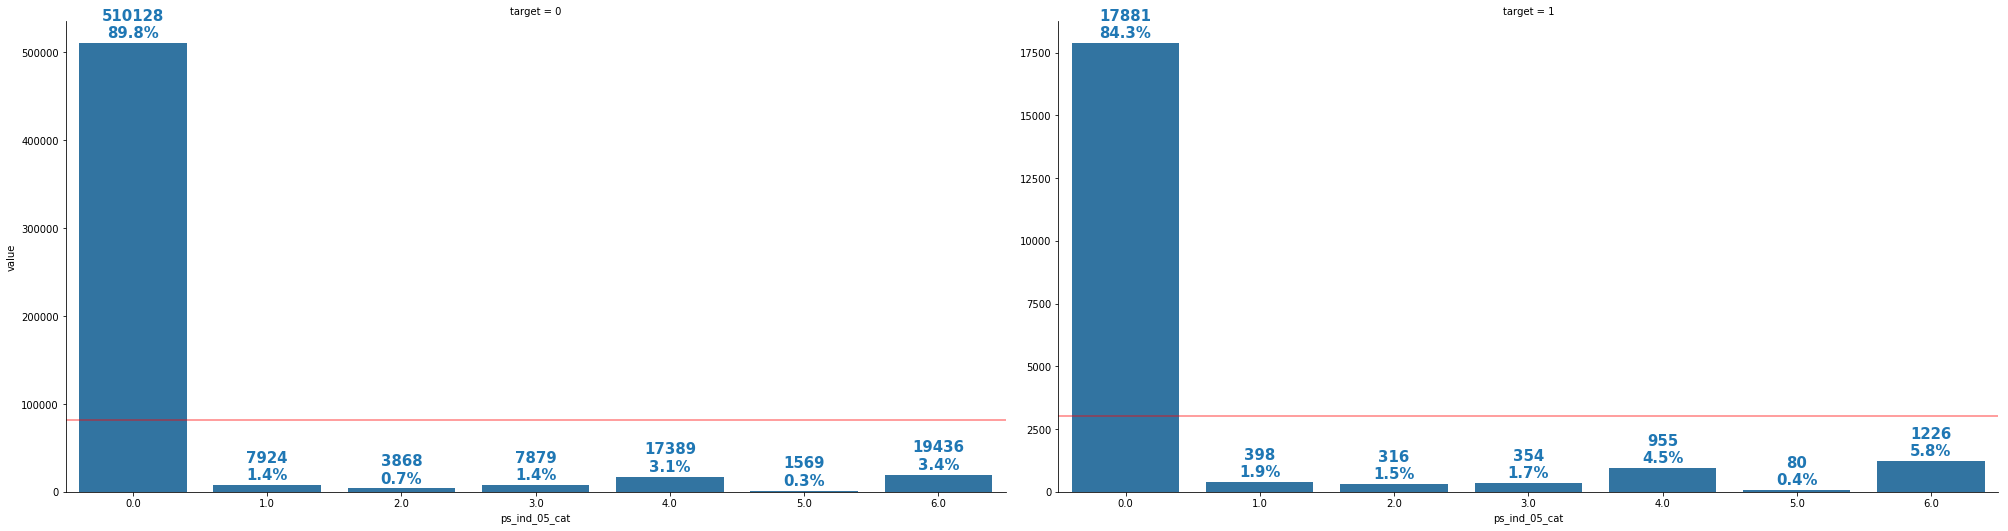

ps_car_01_cat


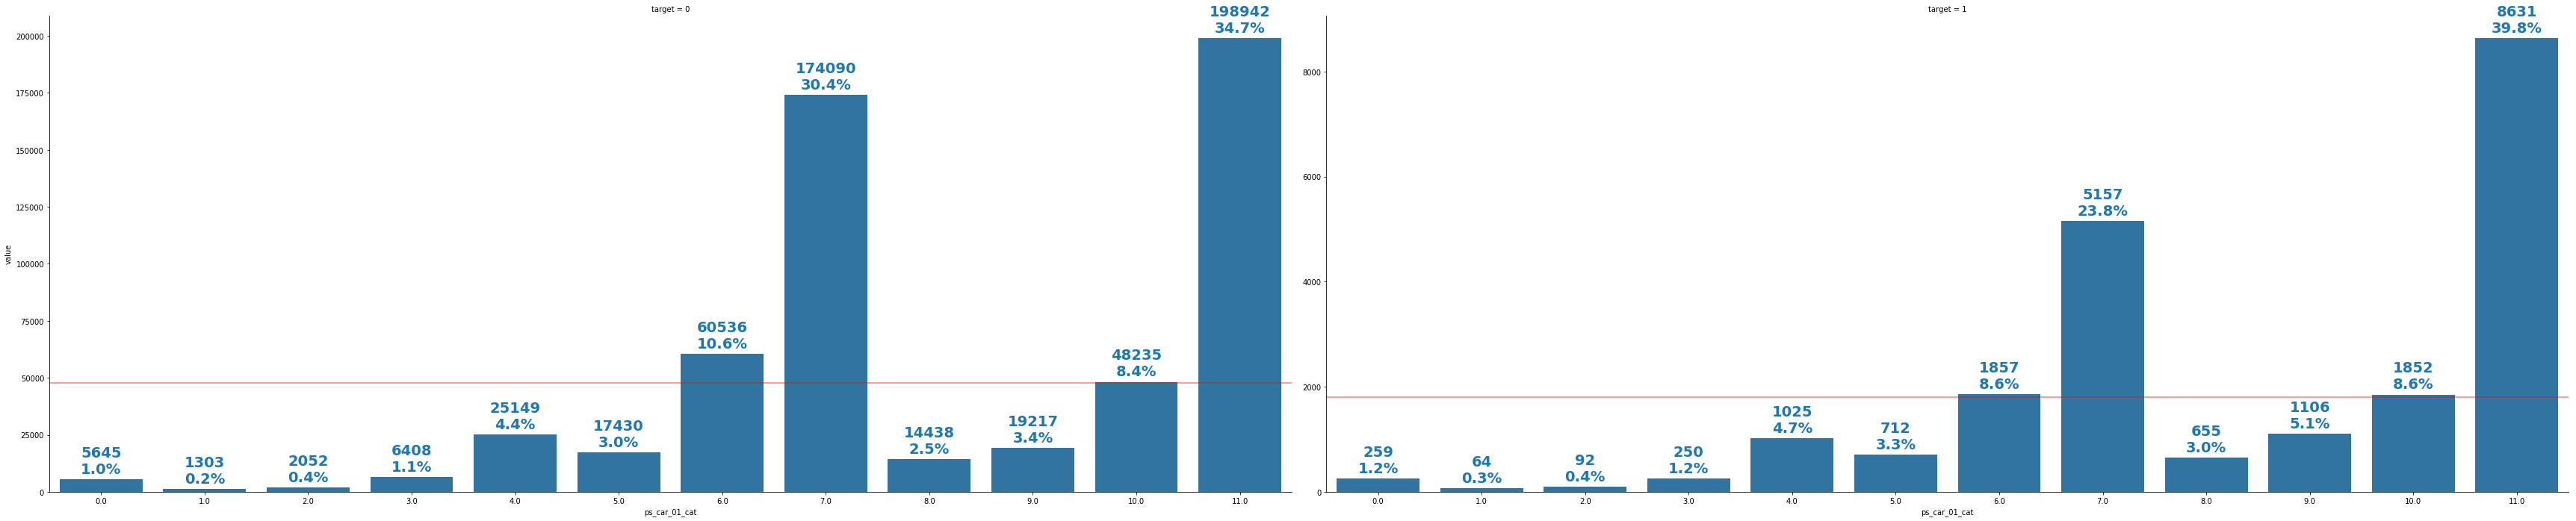

ps_car_02_cat


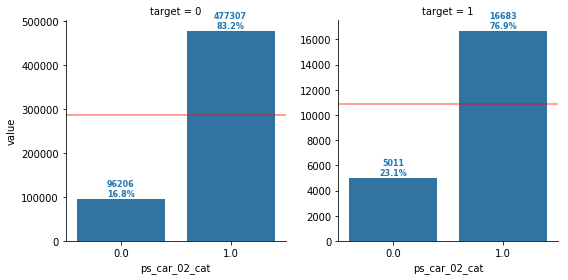

ps_car_03_cat


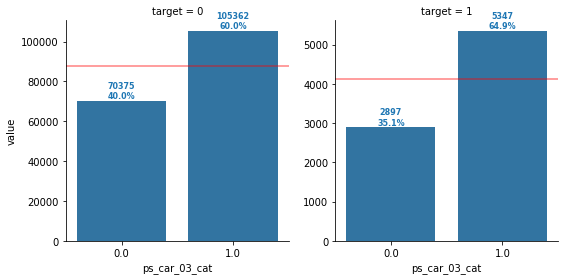

ps_car_04_cat


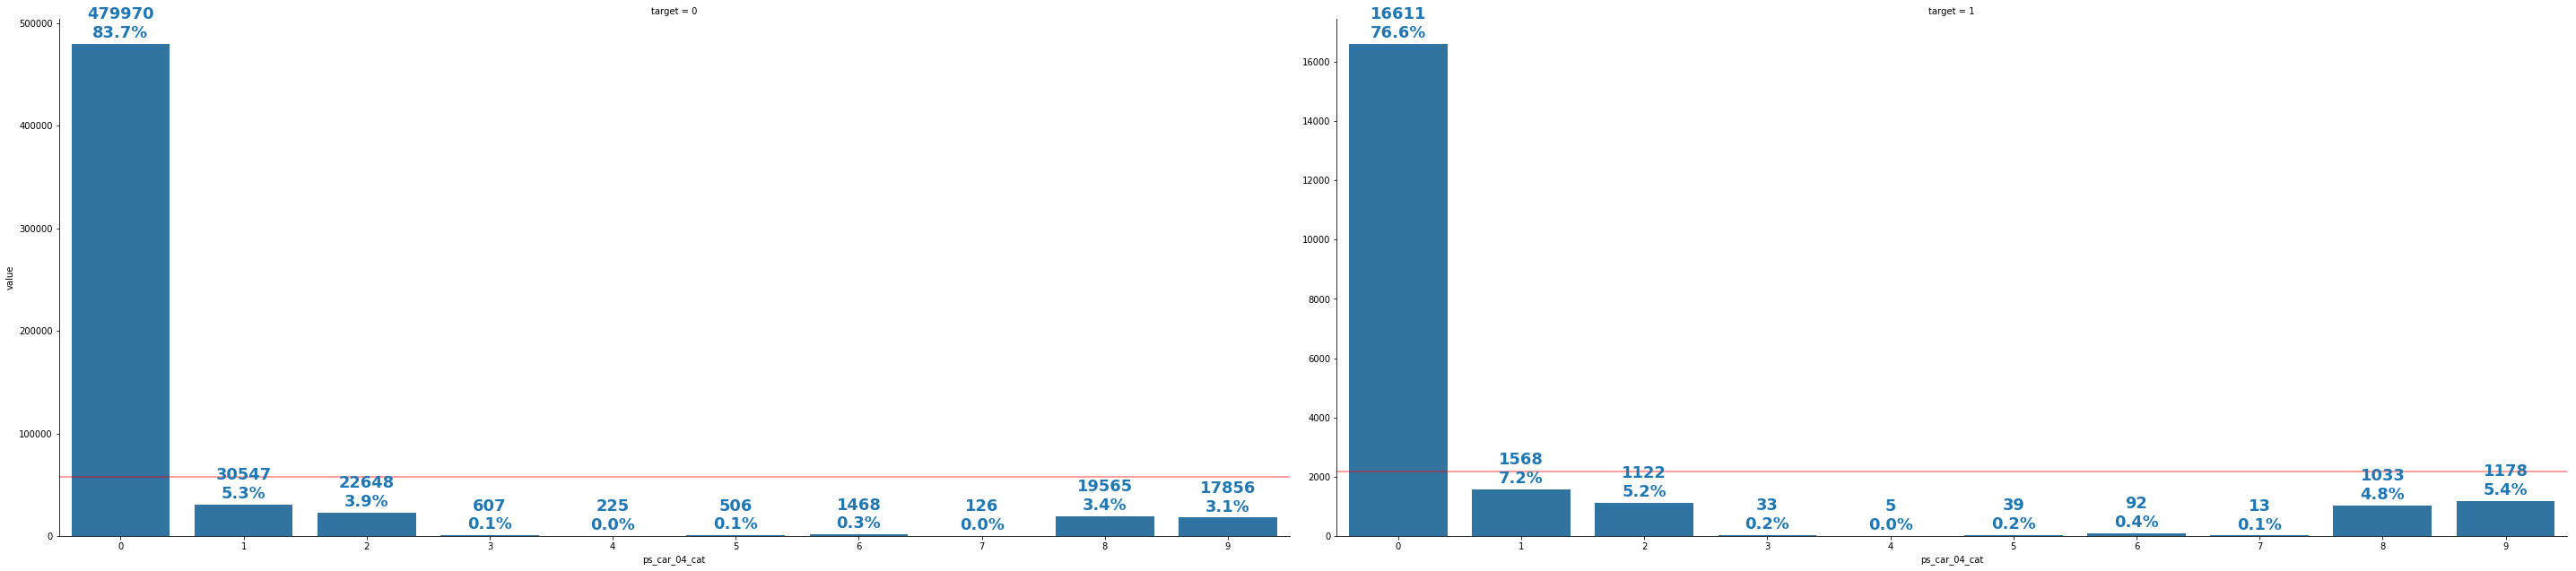

ps_car_05_cat


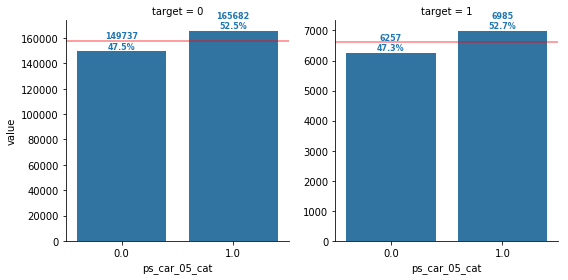

ps_car_06_cat


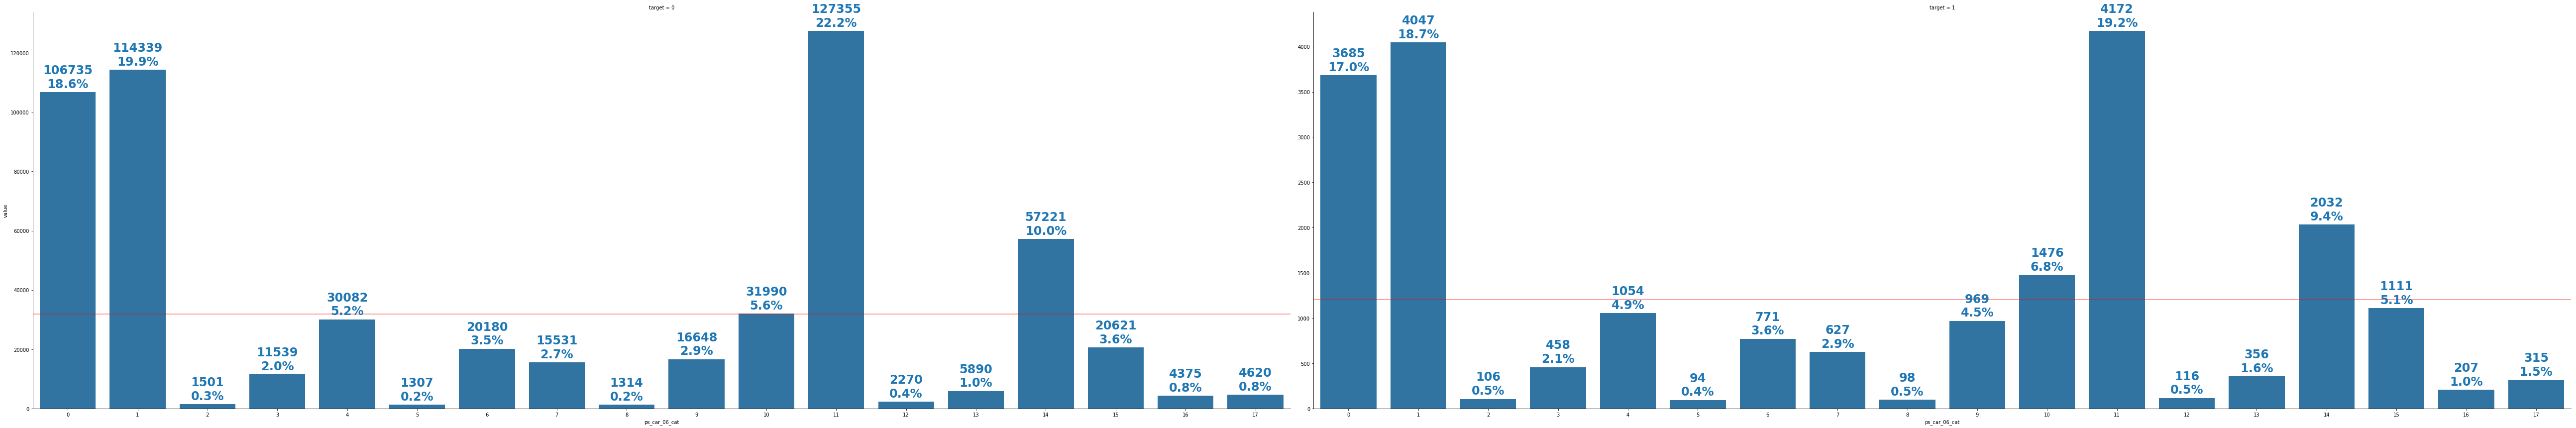

ps_car_07_cat


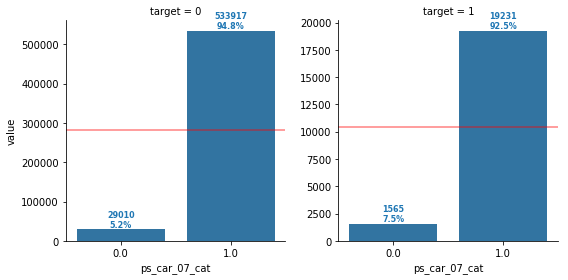

ps_car_08_cat


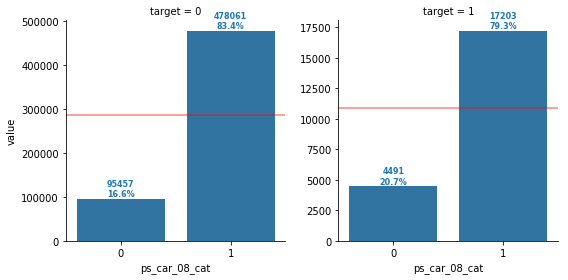

ps_car_09_cat


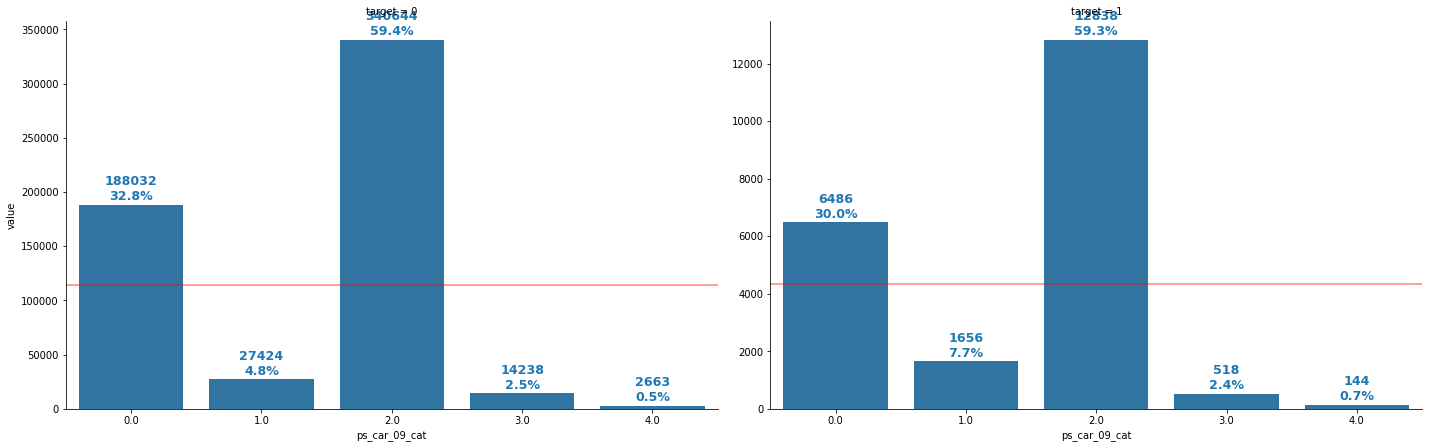

ps_car_10_cat


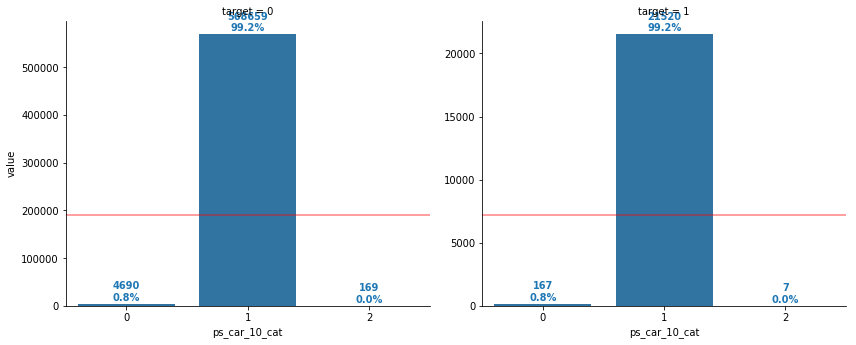

ps_car_11_cat


In [21]:
for col in category:
    print('='*100)
    print(col)
    factor_plot(col)
    plt.show()


In [22]:
labels, cnt = np.unique(trn[category[-1]], return_counts=True)
print(labels)
print(cnt)

[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104]
[ 3331  2553  3185  1596 12513  2480  5653  2481  2211  8732  6716  7246
  3312  2674  1880  7007  3926  1233  5097  1848  2424  8371  1668  2353
  4697  3450  5930 12538  4467  2322  5285 12578  1790  4759  1481  2957
  5008  9246  7676  4870  3182  4944  3311  5628  1706  5355  2035  6010
  5470  1825  6008  3531  4657  1622  4229  1272  3795  1464  1770  7992
  2840  2894  1103 22278 10905  3099  7061  8388  1785  7479  2357  2877
  1858  4975  1678  2606  2405  7334  2079  5710  1433 10470  9510  4893
  6313  3719 17106  4523  5030  5289  1838  6506  2931  3351  3558  2073
  1484  2850 12042  4445  7339  2103 24262 85083]


## Continuous variables

- boxplot and correlation plot

In [23]:
trn[integer].head()

ps_ind_01  ps_ind_03  ps_ind_14  ps_ind_15  ps_reg_01  ps_reg_02  \
0          2          5          0         11        0.7        0.2   
1          1          7          0          3        0.8        0.4   
2          5          9          0         12        0.0        0.0   
3          0          2          0          8        0.9        0.2   
4          0          0          0          9        0.7        0.6   

   ps_reg_03  ps_car_11  ps_car_12  ps_car_13  ...    ps_calc_06  ps_calc_07  \
0   0.718070        2.0   0.400000   0.883679  ...            10           1   
1   0.766078        3.0   0.316228   0.618817  ...             9           5   
2        NaN        1.0   0.316228   0.641586  ...             9           1   
3   0.580948        1.0   0.374166   0.542949  ...             7           1   
4   0.840759        3.0   0.316070   0.565832  ...             6           3   

   ps_calc_08  ps_calc_09  ps_calc_10  ps_calc_11  ps_calc_12  ps_calc_13  \
0          10           1           5           9           1           5   
1           8           1           7           3           1           1   
2           8           2           7           4           2           7   
3           8           4           2           2           2           4   
4          10           2          12           3           1           1   

   ps_calc_14  mscnt  
0           8      1  
1           9      2  
2           7      3  
3           9      0  
4           3      2  

[5 rows x 27 columns]

In [24]:
trn[integer].describe()

ps_ind_01      ps_ind_03      ps_ind_14      ps_ind_15  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        1.900378       4.423318       0.012451       7.299922   
std         1.983789       2.699902       0.127545       3.546042   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.000000       0.000000       5.000000   
50%         1.000000       4.000000       0.000000       7.000000   
75%         3.000000       6.000000       0.000000      10.000000   
max         7.000000      11.000000       4.000000      13.000000   

           ps_reg_01      ps_reg_02      ps_reg_03      ps_car_11  \
count  595212.000000  595212.000000  487440.000000  595207.000000   
mean        0.610991       0.439184       0.894047       2.346100   
std         0.287643       0.404264       0.345413       0.832495   
min         0.000000       0.000000       0.061237       0.000000   
25%         0.400000       0.200000       0.633443       2.000000   
50%         0.700000       0.300000       0.801561       3.000000   
75%         0.900000       0.600000       1.083974       3.000000   
max         0.900000       1.800000       4.037945       3.000000   

           ps_car_12      ps_car_13      ...           ps_calc_06  \
count  595211.000000  595212.000000      ...        595212.000000   
mean        0.379947       0.813265      ...             7.689445   
std         0.058300       0.224588      ...             1.334312   
min         0.100000       0.250619      ...             0.000000   
25%         0.316228       0.670867      ...             7.000000   
50%         0.374166       0.765811      ...             8.000000   
75%         0.400000       0.906190      ...             9.000000   
max         1.264911       3.720626      ...            10.000000   

          ps_calc_07     ps_calc_08     ps_calc_09     ps_calc_10  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        3.005823       9.225904       2.339034       8.433590   
std         1.414564       1.459672       1.246949       2.904597   
min         0.000000       2.000000       0.000000       0.000000   
25%         2.000000       8.000000       1.000000       6.000000   
50%         3.000000       9.000000       2.000000       8.000000   
75%         4.000000      10.000000       3.000000      10.000000   
max         9.000000      12.000000       7.000000      25.000000   

          ps_calc_11     ps_calc_12     ps_calc_13     ps_calc_14  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        5.441382       1.441918       2.872288       7.539026   
std         2.332871       1.202963       1.694887       2.746652   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.000000       1.000000       2.000000       6.000000   
50%         5.000000       1.000000       3.000000       7.000000   
75%         7.000000       2.000000       4.000000       9.000000   
max        19.000000      10.000000      13.000000      23.000000   

               mscnt  
count  595212.000000  
mean        1.422112  
std         0.940689  
min         0.000000  
25%         1.000000  
50%         2.000000  
75%         2.000000  
max         8.000000  

[8 rows x 27 columns]

### correlation

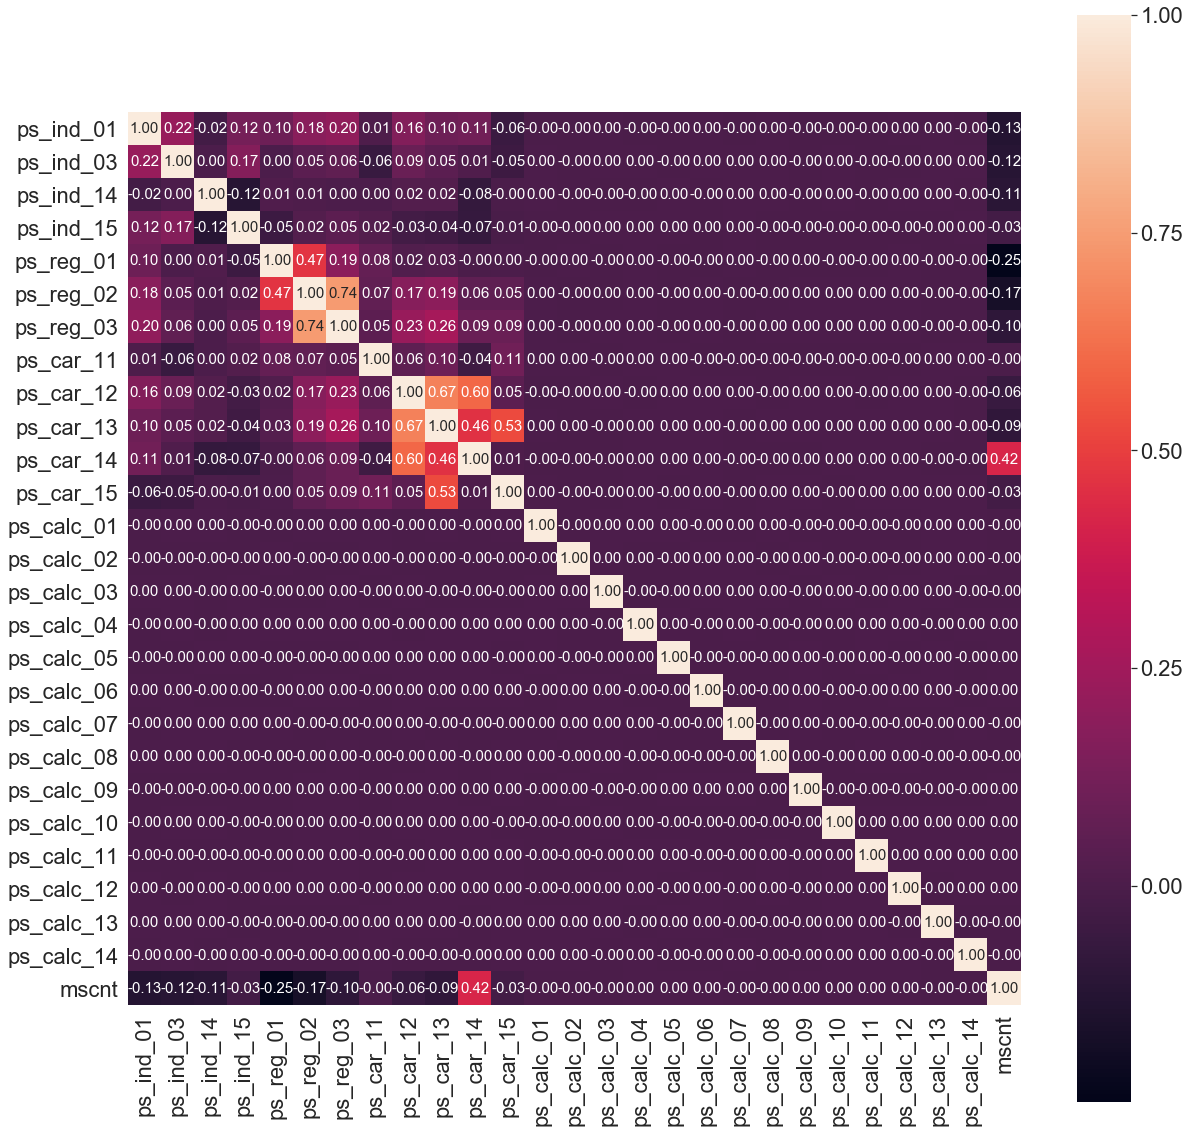

In [25]:
plt.figure(figsize=(20,20))
sns.set(font_scale=2.0)
hm = sns.heatmap(trn[integer].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=integer, xticklabels=integer)
plt.show()

### mean, std by target

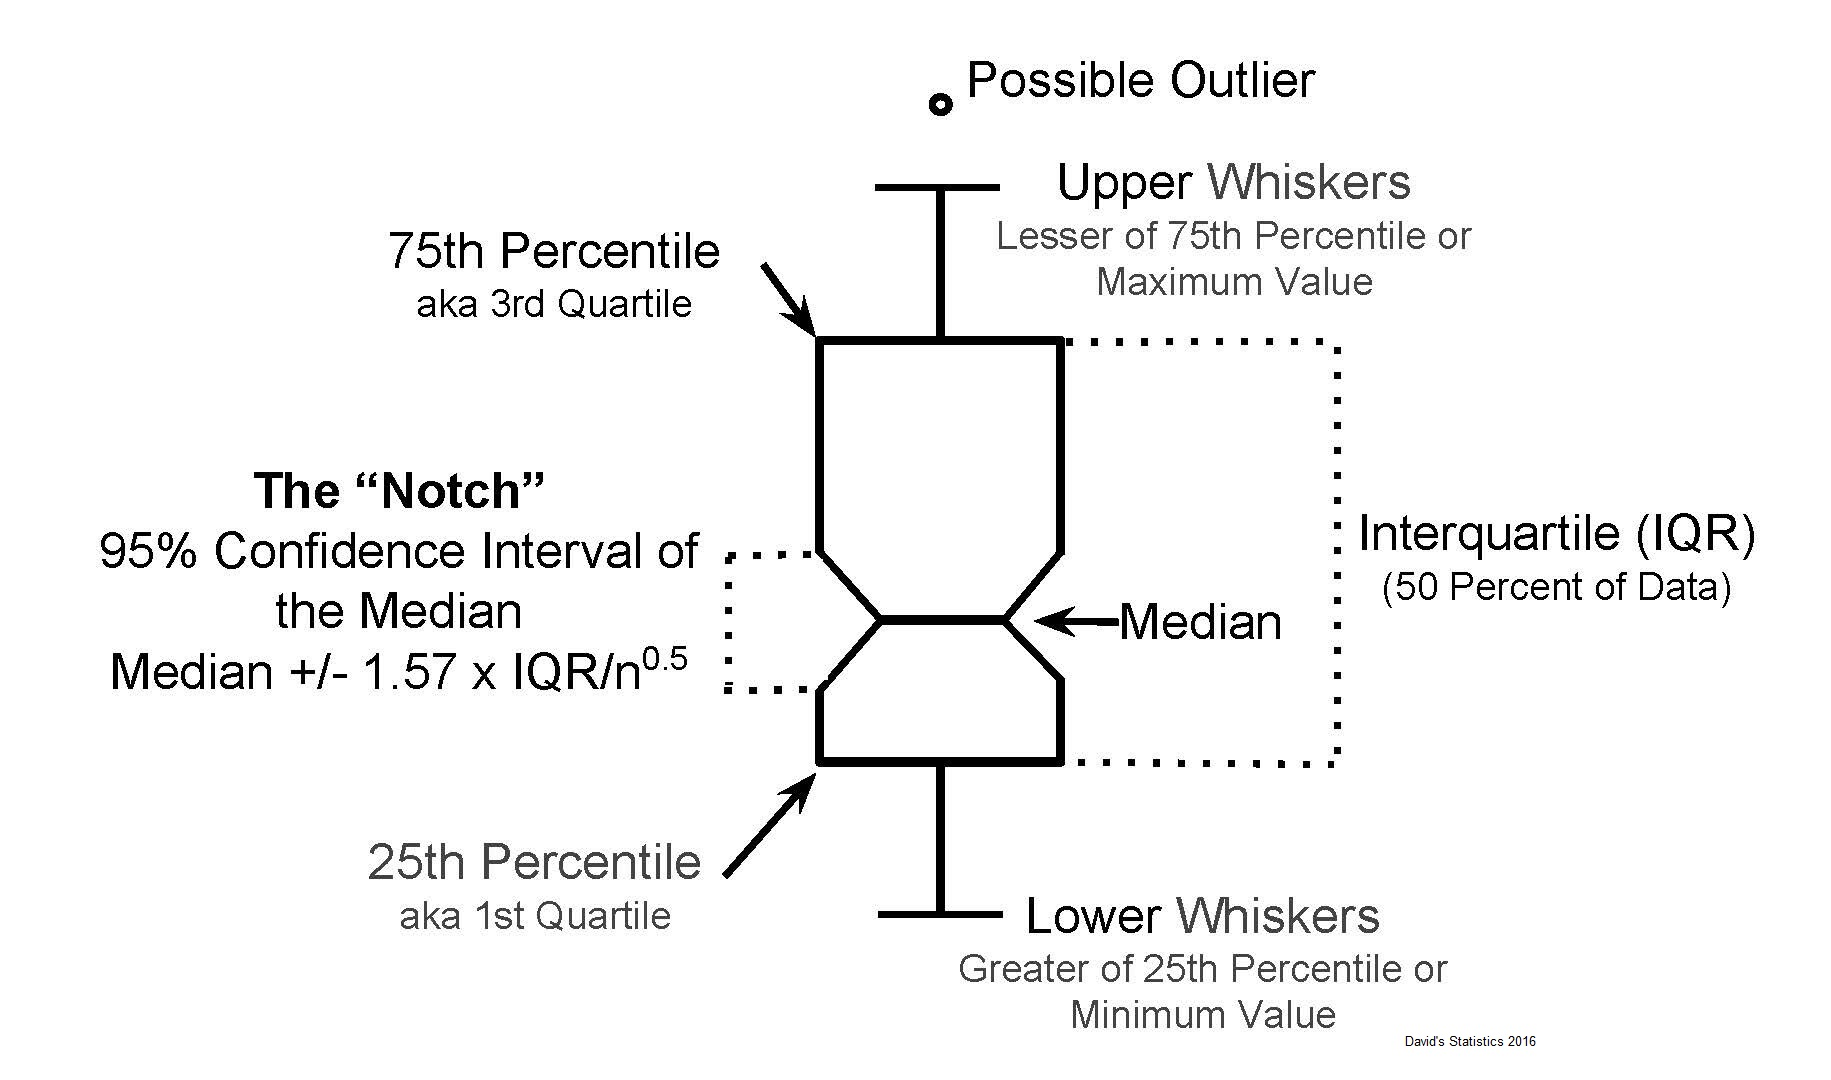

In [26]:
Image(filename="../figure/urPEC.jpg")

ps_ind_01
  level_0  target     value
0    mean       0  1.893213
1    mean       1  2.089794
2  median       0  1.000000
3  median       1  1.000000
4     std       0  1.981189
5     std       1  2.042275


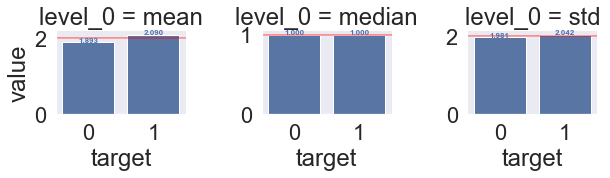

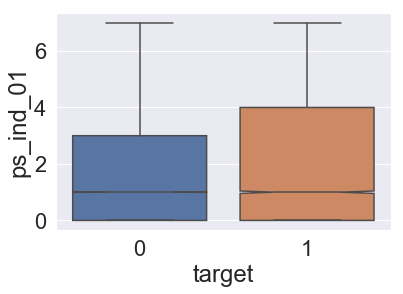

ps_ind_03
  level_0  target     value
0    mean       0  4.418928
1    mean       1  4.539366
2  median       0  4.000000
3  median       1  4.000000
4     std       0  2.696246
5     std       1  2.792390


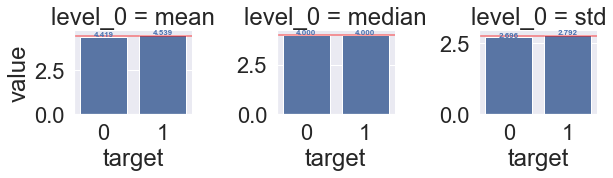

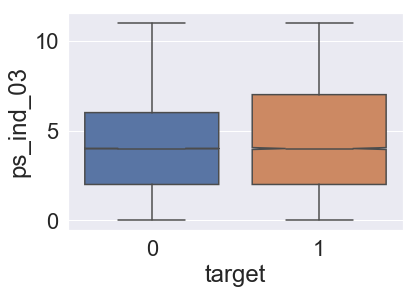

ps_ind_14
  level_0  target     value
0    mean       0  0.012266
1    mean       1  0.017332
2  median       0  0.000000
3  median       1  0.000000
4     std       0  0.126480
5     std       1  0.152951


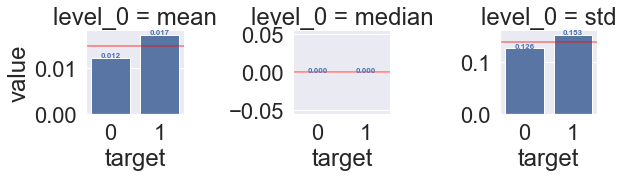

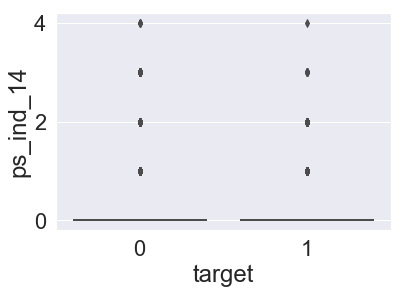

ps_ind_15
  level_0  target     value
0    mean       0  7.314754
1    mean       1  6.907809
2  median       0  7.000000
3  median       1  7.000000
4     std       0  3.544725
5     std       1  3.558428


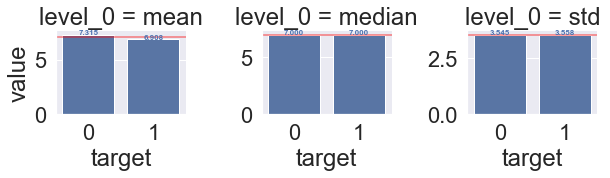

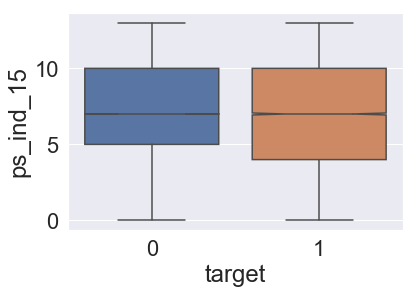

ps_reg_01
  level_0  target     value
0    mean       0  0.609711
1    mean       1  0.644842
2  median       0  0.700000
3  median       1  0.700000
4     std       0  0.287946
5     std       1  0.277385


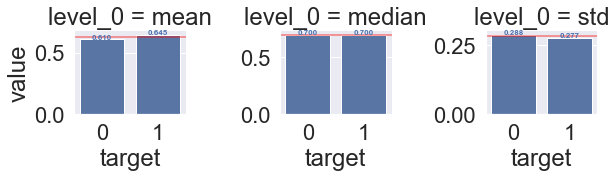

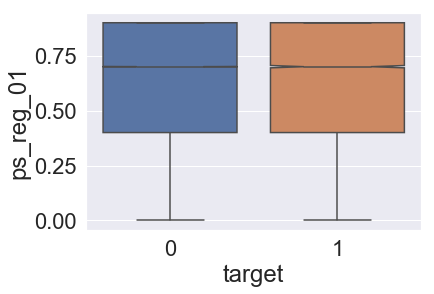

ps_reg_02
  level_0  target     value
0    mean       0  0.436448
1    mean       1  0.511519
2  median       0  0.300000
3  median       1  0.400000
4     std       0  0.402512
5     std       1  0.442019


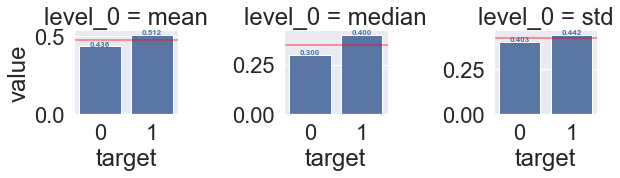

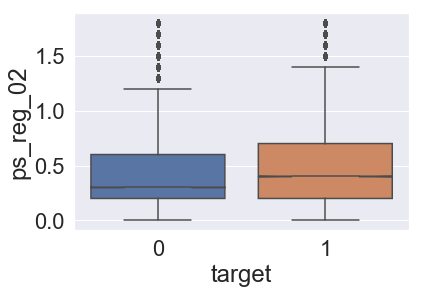

ps_reg_03
  level_0  target     value
0    mean       0  0.891723
1    mean       1  0.952534
2  median       0  0.799218
3  median       1  0.865303
4     std       0  0.344498
5     std       1  0.362817


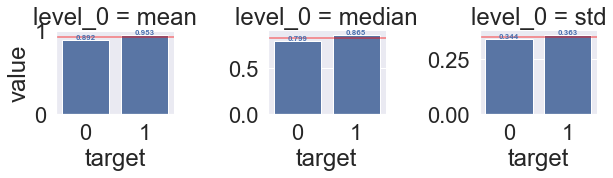

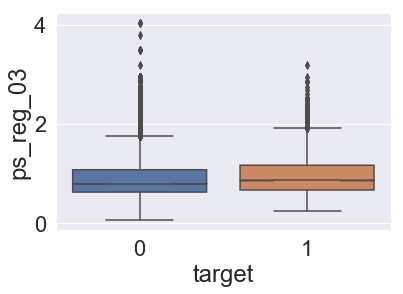

ps_car_11
  level_0  target     value
0    mean       0  2.346297
1    mean       1  2.340878
2  median       0  3.000000
3  median       1  3.000000
4     std       0  0.831969
5     std       1  0.846277


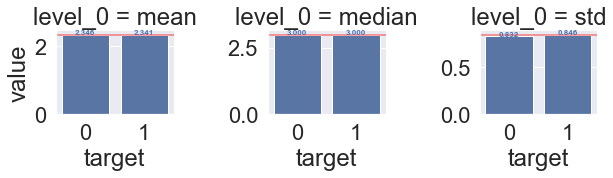

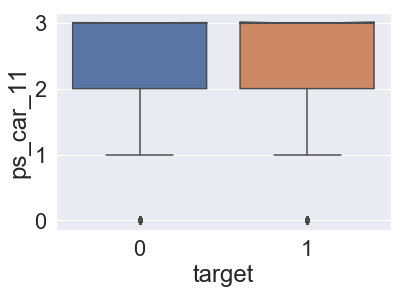

ps_car_12
  level_0  target     value
0    mean       0  0.379507
1    mean       1  0.391578
2  median       0  0.374166
3  median       1  0.400000
4     std       0  0.058049
5     std       1  0.063481


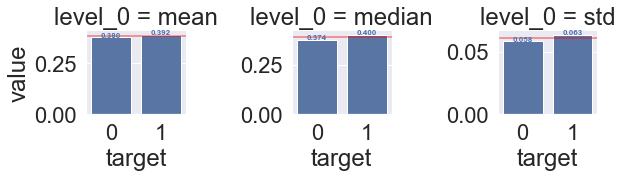

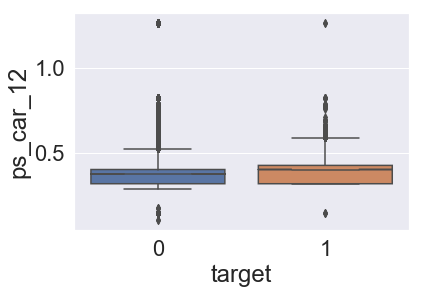

ps_car_13
  level_0  target     value
0    mean       0  0.810910
1    mean       1  0.875505
2  median       0  0.764664
3  median       1  0.816846
4     std       0  0.222710
5     std       1  0.261968


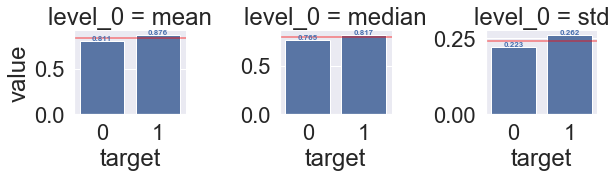

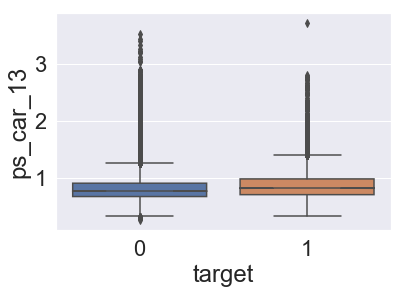

ps_car_14
  level_0  target     value
0    mean       0  0.374588
1    mean       1  0.377440
2  median       0  0.373497
3  median       1  0.374833
4     std       0  0.045422
5     std       1  0.050297


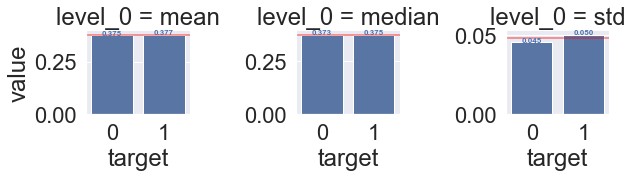

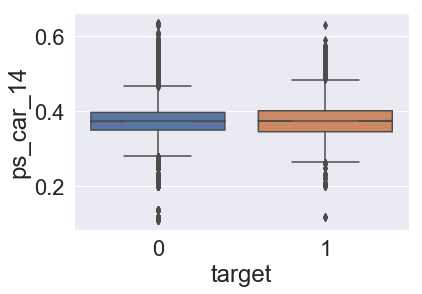

ps_car_15
  level_0  target     value
0    mean       0  3.061964
1    mean       1  3.169940
2  median       0  3.316625
3  median       1  3.316625
4     std       0  0.734222
5     std       1  0.642692


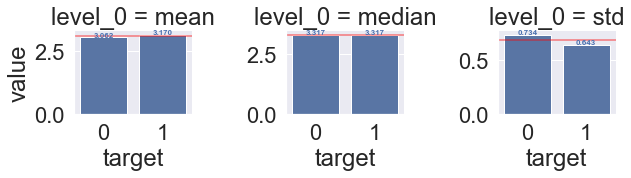

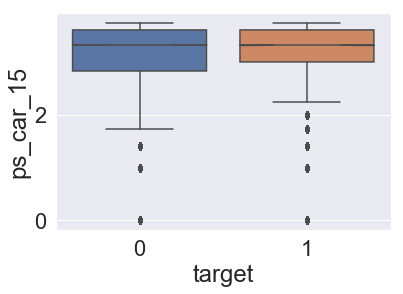

ps_calc_01
  level_0  target     value
0    mean       0  0.449657
1    mean       1  0.452388
2  median       0  0.500000
3  median       1  0.500000
4     std       0  0.287223
5     std       1  0.286539


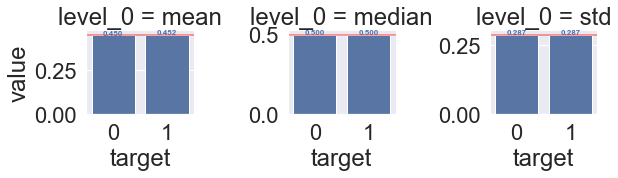

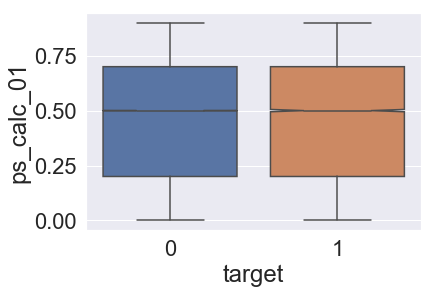

ps_calc_02
  level_0  target     value
0    mean       0  0.449513
1    mean       1  0.451595
2  median       0  0.400000
3  median       1  0.500000
4     std       0  0.286961
5     std       1  0.285094


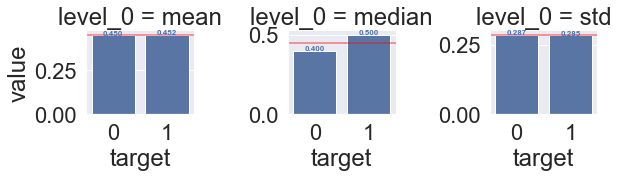

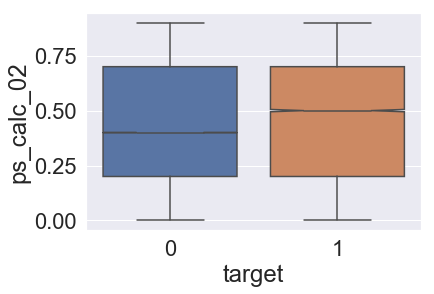

ps_calc_03
  level_0  target     value
0    mean       0  0.449742
1    mean       1  0.452664
2  median       0  0.500000
3  median       1  0.500000
4     std       0  0.287191
5     std       1  0.286131


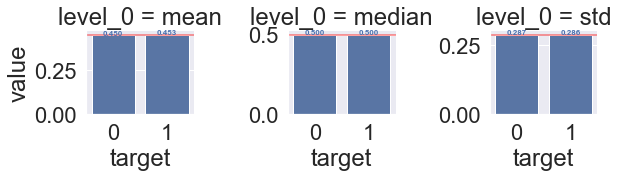

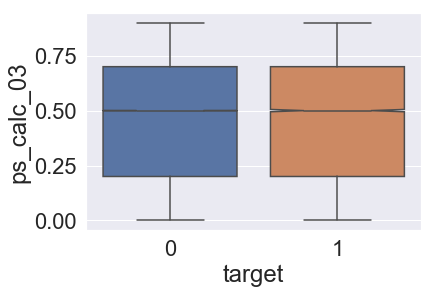

ps_calc_04
  level_0  target     value
0    mean       0  2.372074
1    mean       1  2.372269
2  median       0  2.000000
3  median       1  2.000000
4     std       0  1.117252
5     std       1  1.116369


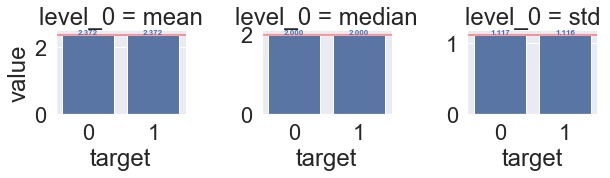

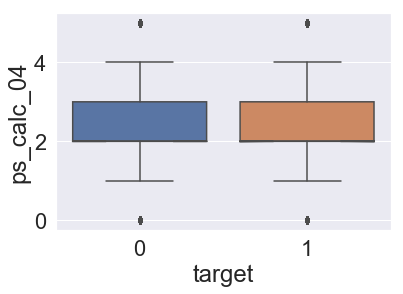

ps_calc_05
  level_0  target     value
0    mean       0  1.885716
1    mean       1  1.890384
2  median       0  2.000000
3  median       1  2.000000
4     std       0  1.134733
5     std       1  1.140063


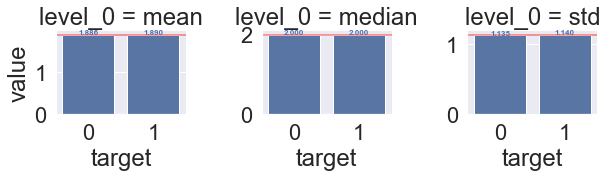

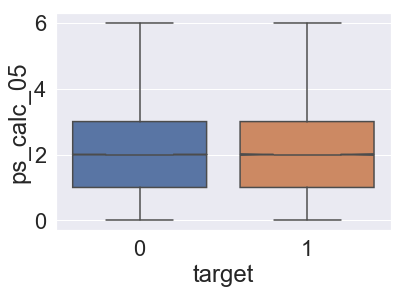

ps_calc_06
  level_0  target     value
0    mean       0  7.689424
1    mean       1  7.690006
2  median       0  8.000000
3  median       1  8.000000
4     std       0  1.334538
5     std       1  1.328362


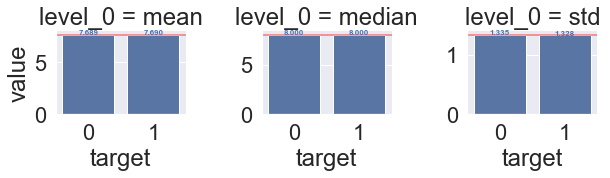

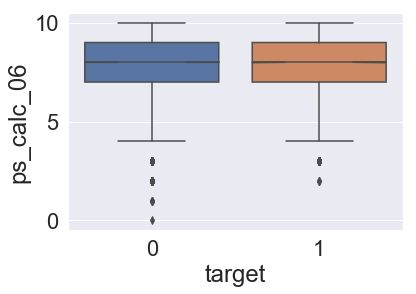

ps_calc_07
  level_0  target     value
0    mean       0  3.005852
1    mean       1  3.005071
2  median       0  3.000000
3  median       1  3.000000
4     std       0  1.414216
5     std       1  1.423756


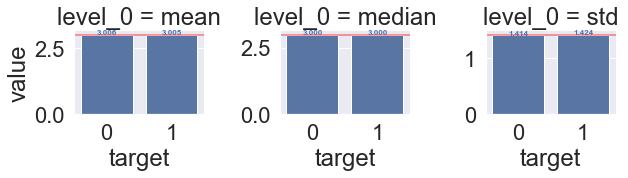

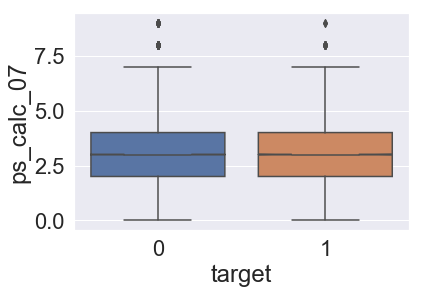

ps_calc_08
  level_0  target     value
0    mean       0  9.226190
1    mean       1  9.218355
2  median       0  9.000000
3  median       1  9.000000
4     std       0  1.459516
5     std       1  1.463813


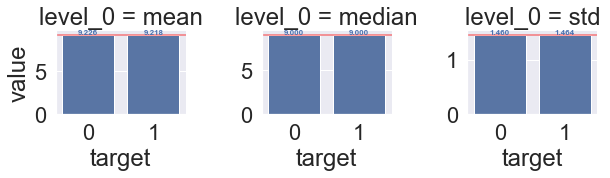

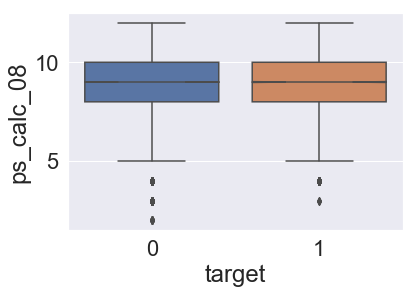

ps_calc_09
  level_0  target     value
0    mean       0  2.338859
1    mean       1  2.343643
2  median       0  2.000000
3  median       1  2.000000
4     std       0  1.247103
5     std       1  1.242896


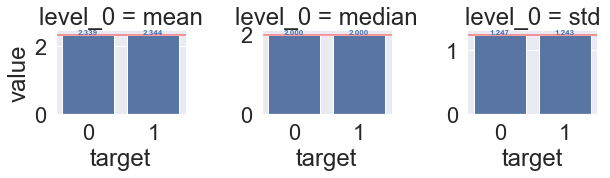

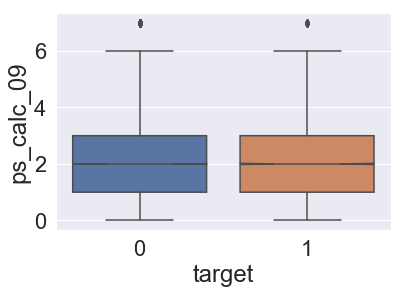

ps_calc_10
  level_0  target     value
0    mean       0  8.432991
1    mean       1  8.449433
2  median       0  8.000000
3  median       1  8.000000
4     std       0  2.904780
5     std       1  2.899793


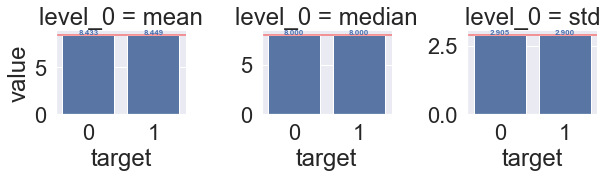

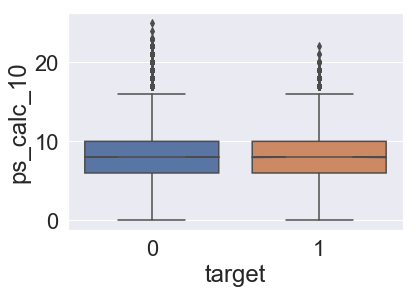

ps_calc_11
  level_0  target     value
0    mean       0  5.441214
1    mean       1  5.445838
2  median       0  5.000000
3  median       1  5.000000
4     std       0  2.332152
5     std       1  2.351865


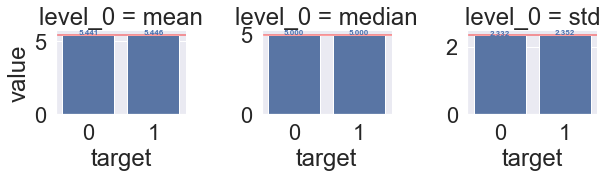

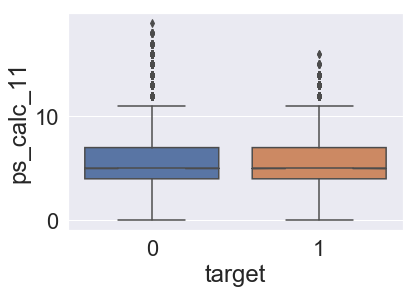

ps_calc_12
  level_0  target     value
0    mean       0  1.442183
1    mean       1  1.434913
2  median       0  1.000000
3  median       1  1.000000
4     std       0  1.203065
5     std       1  1.200263


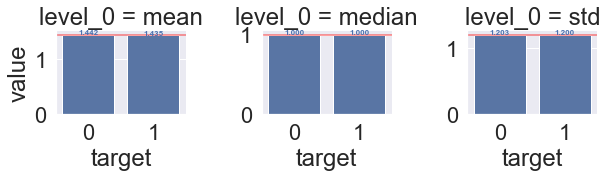

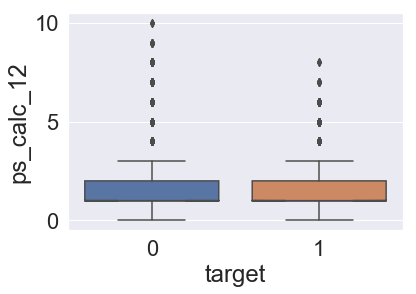

ps_calc_13
  level_0  target     value
0    mean       0  2.872435
1    mean       1  2.868397
2  median       0  3.000000
3  median       1  3.000000
4     std       0  1.694934
5     std       1  1.693677


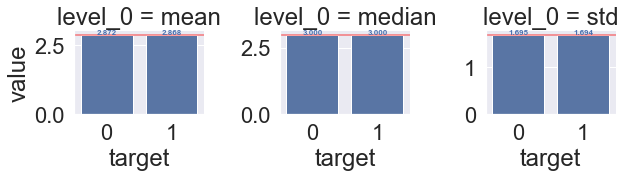

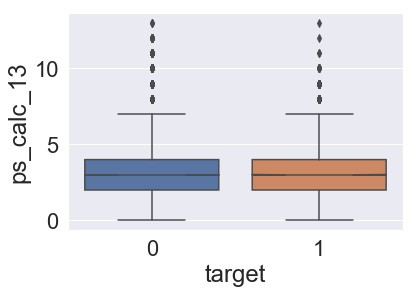

ps_calc_14
  level_0  target     value
0    mean       0  7.538299
1    mean       1  7.558265
2  median       0  7.000000
3  median       1  7.000000
4     std       0  2.746464
5     std       1  2.751613


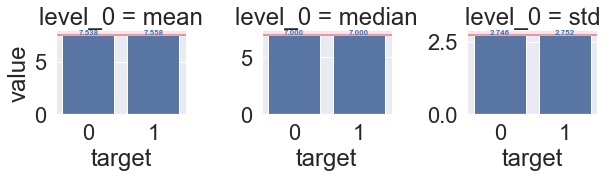

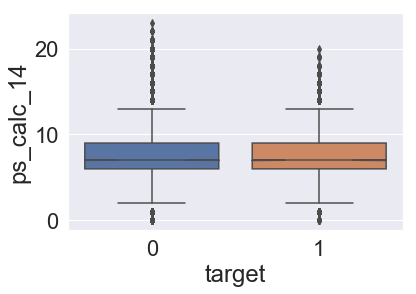

mscnt
  level_0  target     value
0    mean       0  1.426689
1    mean       1  1.301097
2  median       0  2.000000
3  median       1  1.000000
4     std       0  0.939324
5     std       1  0.968295


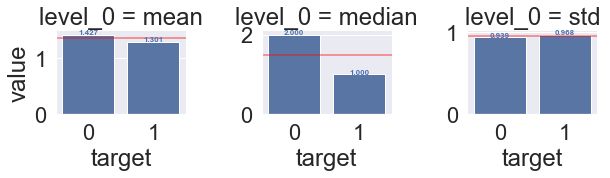

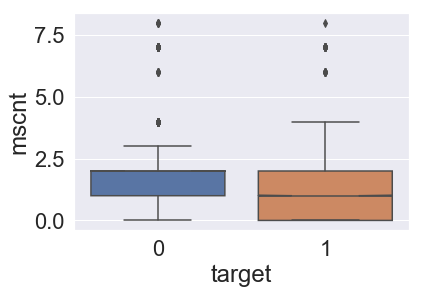

In [52]:
for col in integer:
    print('='*100)
    print(col)
    integer_plot(col)
    plt.show()
    sns.boxplot(x=trn.target, y=trn[col], notch=True)
    plt.show()